# Transfer Learning using Tensorflow 2 #
First, import tensorflow 2.0

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


## Download, Unzip and import the dataset ##
Ideally, the dataset should have files in ./train and ./test to make importing the files easier. Alternately, different methods can be used to import the images rather than flow_from_directory

To download and unzip simply make a wget request to the dataset and unzip the downloaded file using command line(!):



In [0]:
!wget -O "dataset.zip" "https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media"

--2020-04-20 17:49:52--  https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 74.125.195.95, 2607:f8b0:400e:c0a::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|74.125.195.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397174132 (379M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 378.77M   101MB/s    in 3.7s    

2020-04-20 17:49:56 (101 MB/s) - ‘dataset.zip’ saved [397174132/397174132]



In [0]:
%%capture
!unzip "/content/dataset.zip"


Using Image data generator and flow_from_directory from tf.keras.preprocessing, import the dataset (and repeat for the test set):



In [0]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(preprocessing_function=preprocess_input, #included in our dependencies
                                 validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dataset',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                  subset='training')
val_generator = datagen.flow_from_directory('/content/dataset',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                subset='validation')


Found 11435 images belonging to 18 classes.
Found 2851 images belonging to 18 classes.


## Load the pretrained model of choice ##
Choose a model from the following link: https://www.tensorflow.org/api_docs/python/tf/keras/applications In the sample code, we chose to use the Xception model. First, we need to import the different objects we are going to need:


In [0]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

Load the model, add a Global Average Pooling layer to the output, followed by 2 Densely conneced networks, one with activation relu and the other with softmax. The softmax layer will give the actual output.


In [0]:
base_model=MobileNetV2(weights='imagenet',include_top=False)
for layer in base_model.layers:
    layer.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(18,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input,outputs=preds) 

## Compile, Train, and Test the model ##
Compile the model with the settings of your choice, for the optimizer, loss and metrics. Then, use model.fit to train it.


In [0]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay = 0.01)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
step_size_train=train_generator.n//train_generator.batch_size
val_step_size=val_generator.n//val_generator.batch_size

In [0]:
model.fit(train_generator, steps_per_epoch=step_size_train,
                    validation_data=val_generator, 
                    validation_steps = val_step_size,
                    epochs=10)


Epoch 1/10
357/357 [==============================] - 39s 109ms/step - loss: 3.3383 - accuracy: 0.6846 - val_loss: 1.7735 - val_accuracy: 0.7389
Epoch 2/10
357/357 [==============================] - 38s 107ms/step - loss: 0.7948 - accuracy: 0.8515 - val_loss: 1.3369 - val_accuracy: 0.7662
Epoch 3/10
357/357 [==============================] - 38s 106ms/step - loss: 0.5311 - accuracy: 0.8887 - val_loss: 1.2601 - val_accuracy: 0.7758
Epoch 4/10
357/357 [==============================] - 38s 107ms/step - loss: 0.4191 - accuracy: 0.9035 - val_loss: 1.2145 - val_accuracy: 0.7815
Epoch 5/10
357/357 [==============================] - 38s 107ms/step - loss: 0.3601 - accuracy: 0.9146 - val_loss: 1.2262 - val_accuracy: 0.7708
Epoch 6/10
357/357 [==============================] - 38s 107ms/step - loss: 0.3254 - accuracy: 0.9229 - val_loss: 1.1526 - val_accuracy: 0.7840
Epoch 7/10
357/357 [==============================] - 38s 105ms/step - loss: 0.2940 - accuracy: 0.9271 - val_loss: 1.1448 - val_ac

To test the model, call model.evaluate and it will return the result based on the metrics chosen during compilation:



In [0]:
for layer in model.layers:
  layer.trainable = True

sgd = optimizers.SGD(lr=0.001, momentum=0.9, decay = 0.0001, nesterov = True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
val_step_size=val_generator.n//val_generator.batch_size
model.fit(train_generator, steps_per_epoch=step_size_train,
                    validation_data=val_generator, 
                    validation_steps = val_step_size,
                    epochs=10)


Epoch 1/10
357/357 [==============================] - 63s 177ms/step - loss: 0.7269 - accuracy: 0.8251 - val_loss: 5.4247 - val_accuracy: 0.4604
Epoch 2/10
357/357 [==============================] - 63s 178ms/step - loss: 0.1714 - accuracy: 0.9556 - val_loss: 2.1035 - val_accuracy: 0.6630
Epoch 3/10
357/357 [==============================] - 63s 177ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 1.2583 - val_accuracy: 0.7765
Epoch 4/10
357/357 [==============================] - 63s 175ms/step - loss: 0.0253 - accuracy: 0.9935 - val_loss: 0.7612 - val_accuracy: 0.8588
Epoch 5/10
357/357 [==============================] - 63s 176ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.6553 - val_accuracy: 0.8787
Epoch 6/10
357/357 [==============================] - 63s 177ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.5826 - val_accuracy: 0.9049
Epoch 7/10
357/357 [==============================] - 62s 173ms/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.5431 - val_ac

## Visualizing the testing process ##
Test the model by loading in images, converting them into the target size, loading them as np arrays, and preprocessing them in the same manner as the input, and plotting the image with the result

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np
%matplotlib inline

def test_with(test_file_path):
  img = image.load_img(test_file_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter', 
  'BravoHall', 'BrooksHall', 'ClarkHall','MadisonHall', 'MinorHall', 'NewCabellHall', 
  'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall', 'Rotunda', 'ScottStadium', 
  'ThorntonHall','UniversityChapel']
  plt.imshow(img)
  plt.show()
  print('Predicted:', preds.argmax(axis=-1), class_names[preds.argmax(axis=-1)[0]])

Few test samples:

In [0]:
%%capture
!wget -O "testTh.jpg" "https://www.studenthealth.virginia.edu/sites/studenthealth.virginia.edu/files/Thornton_Hall_Spring_17_SS_01.jpg"

!wget -O "testRot.jpg" "https://upload.wikimedia.org/wikipedia/commons/b/bf/Rotunda_UVa_from_the_south_east.jpg"

!wget -O "testCh.jpg" "https://eventplanning.odos.virginia.edu/sites/eventplanning.odos.virginia.edu/files/chapel_0.jpg"

!wget -O "testR.jpg" "https://media.glassdoor.com/l/d7/f4/d2/5d/rice-hall-computer-science.jpg"

!wget -O "testNw.jpg" "https://eventplanning.odos.virginia.edu/sites/eventplanning.odos.virginia.edu/files/newcomb.jpg"

!wget -O "testNC.jpg" "https://news.virginia.edu/sites/default/files/styles/uva_basic_article/public/article_image/14697_photo_1_high_res.jpg"

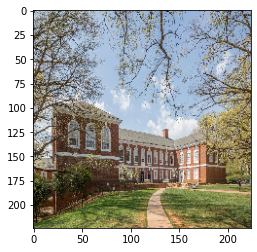

Predicted: [16] ThorntonHall


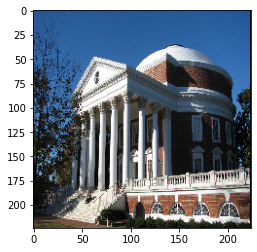

Predicted: [14] Rotunda


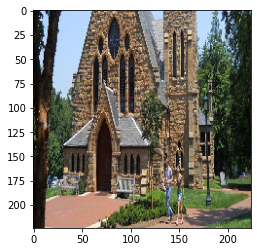

Predicted: [17] UniversityChapel


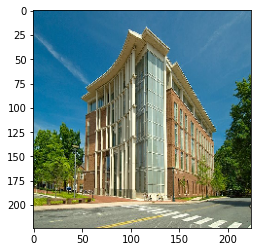

Predicted: [13] RiceHall


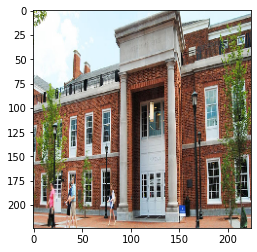

Predicted: [10] NewcombHall


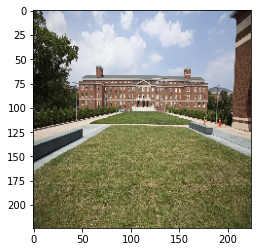

Predicted: [9] NewCabellHall


In [0]:
test_with("./testTh.jpg")
test_with("./testRot.jpg")
test_with("./testCh.jpg")
test_with("./testR.jpg")
test_with("./testNw.jpg")
test_with("./testNC.jpg")